# Module 4

### Query4.1 
Import the csv file of the stock which contained the Bollinger columns as well.

* Create a new column 'Call' , whose entries are - 
  * 'Buy' if the stock price is below the lower Bollinger band 
  * 'Hold Buy/ Liquidate Short' if the stock price is between the lower and middle Bollinger band 
  * 'Hold Short/ Liquidate Buy' if the stock price is between the middle and upper Bollinger band 
  * 'Short' if the stock price is above the upper Bollinger band
  
* Now train a classification model with the 3 bollinger columns and the stock price as inputs and 'Calls' as output. Check the accuracy on a test set. (There are many classifier models to choose from, try each one out and compare the accuracy for each)

* Import another stock data and create the bollinger columns. Using the already defined model, predict the daily calls for this new stock.


In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
%matplotlib notebook

In [2]:
df = pd.read_csv('Small_Cap/FORTIS.csv')
df['Average'] = pd.read_csv("week2 v.csv")
df['+2 SD'] = pd.read_csv('week2 vu.csv')
df['-2 SD'] = pd.read_csv('week2 vl.csv')
df = df.dropna()
df['Date'] = df['Date'].astype('datetime64')
df.set_index('Date',inplace =True)
df.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Average,+2 SD,-2 SD
Date,,,,,,,,,,,,,,,,,
2017-06-01,FORTIS,EQ,195.15,195.90,200.25,195.15,199.80,198.35,197.35,837394,1.652597e+08,6033,248194,29.64,199.871429,209.101539,190.641318
2017-06-02,FORTIS,EQ,198.35,200.05,201.60,191.75,193.20,192.95,195.33,2967855,5.797230e+08,15457,1540619,51.91,198.992857,208.358166,189.627548
2017-06-05,FORTIS,EQ,192.95,194.00,196.90,193.60,194.75,194.90,195.37,1688838,3.299437e+08,12741,654094,38.73,198.064286,206.110253,190.018319
2017-06-06,FORTIS,EQ,194.90,195.40,195.45,189.10,190.40,191.05,192.04,3708378,7.121618e+08,17057,2344287,63.22,197.003571,204.496077,189.511066
2017-06-07,FORTIS,EQ,191.05,191.10,198.70,191.10,194.50,194.05,195.63,3368728,6.590180e+08,21279,1095546,32.52,196.803571,204.461394,189.145748


In [3]:
df['Call'] = np.nan
df['Call'] = df['Call'].astype('str')

for i in range(len(df)):
    if df['Close Price'][i] < df['-2 SD'][i]:
        df['Call'][i] = 'Buy'
    elif df['Close Price'][i] > df['-2 SD'][i] and df['Close Price'][i] < df['Average'][i] :
        df['Call'][i] = 'Hold Buy/ Liquidate Short'
    elif df['Close Price'][i] < df['+2 SD'][i] and df['Close Price'][i] > df['Average'][i]:
        df['Call'][i] = 'Hold Short/ Liquidate Buy'
    elif df['Close Price'][i] > df['+2 SD'][i] :
        df['Call'][i] = 'Short'
    
df.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Average,+2 SD,-2 SD,Call
Date,,,,,,,,,,,,,,,,,,
2017-06-01,FORTIS,EQ,195.15,195.90,200.25,195.15,199.80,198.35,197.35,837394,1.652597e+08,6033,248194,29.64,199.871429,209.101539,190.641318,Hold Buy/ Liquidate Short
2017-06-02,FORTIS,EQ,198.35,200.05,201.60,191.75,193.20,192.95,195.33,2967855,5.797230e+08,15457,1540619,51.91,198.992857,208.358166,189.627548,Hold Buy/ Liquidate Short
2017-06-05,FORTIS,EQ,192.95,194.00,196.90,193.60,194.75,194.90,195.37,1688838,3.299437e+08,12741,654094,38.73,198.064286,206.110253,190.018319,Hold Buy/ Liquidate Short
2017-06-06,FORTIS,EQ,194.90,195.40,195.45,189.10,190.40,191.05,192.04,3708378,7.121618e+08,17057,2344287,63.22,197.003571,204.496077,189.511066,Hold Buy/ Liquidate Short
2017-06-07,FORTIS,EQ,191.05,191.10,198.70,191.10,194.50,194.05,195.63,3368728,6.590180e+08,21279,1095546,32.52,196.803571,204.461394,189.145748,Hold Buy/ Liquidate Short


Classification models used are:
* Logistic Regression
* KNN
* Kernel SVM
* Naive Bayes
* Decision Tree
* Random Forest

In [4]:
def accuracy(cm):
    num = cm.trace()
    deno = cm.sum()
    return num/deno

In [5]:
X = df.iloc[:,[7,-4,-3,-2]].values
y = df.iloc[:,-1:].values

from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y = lb.fit_transform(y)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state = 5)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

from sklearn.metrics import confusion_matrix

In [6]:
#Logistic Rergression

from sklearn.linear_model import LogisticRegression
classifer_logi = LogisticRegression(random_state = 5)
classifer_logi.fit(X_train,y_train)

y_pred_logi = classifer_logi.predict(X_test)

cm_logi = confusion_matrix(y_test,y_pred_logi)
print("The accuracy of logistic model classifier is :" + str(accuracy(cm_logi)))

The accuracy of logistic model classifier is :0.9587628865979382


In [7]:
# KNN

from sklearn.neighbors import KNeighborsClassifier
classifer_KNN = KNeighborsClassifier(n_neighbors = 3)
classifer_KNN.fit(X_train,y_train)

y_pred_KNN = classifer_KNN.predict(X_test)

cm_KNN = confusion_matrix(y_test,y_pred_KNN)
print("The accuracy of KNN model classifier is :" + str(accuracy(cm_KNN)))

The accuracy of KNN model classifier is :0.9278350515463918


In [8]:
# Kernel SVM
from sklearn.svm import SVC
classifer_kSVC = SVC(kernel='rbf', random_state = 5)
classifer_kSVC.fit(X_train,y_train)

y_pred_kSVC = classifer_kSVC.predict(X_test)

cm_kSVC = confusion_matrix(y_test,y_pred_kSVC)
print("The accuracy of Kernel SVM model classifier is :" + str(accuracy(cm_kSVC)))

The accuracy of Kernel SVM model classifier is :0.9484536082474226


In [9]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifer_NB = GaussianNB()
classifer_NB.fit(X_train,y_train)

y_pred_NB = classifer_NB.predict(X_test)

cm_NB = confusion_matrix(y_test,y_pred_NB)
print("The accuracy of Naive Bayes model classifier is :" + str(accuracy(cm_NB)))

The accuracy of Naive Bayes model classifier is :0.4948453608247423


In [10]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
classifer_DT = DecisionTreeClassifier()
classifer_DT.fit(X_train,y_train)

y_pred_DT = classifer_DT.predict(X_test)

cm_DT = confusion_matrix(y_test,y_pred_DT)
print("The accuracy of Decision Tree model classifier is :" + str(accuracy(cm_DT)))

The accuracy of Decision Tree model classifier is :0.8762886597938144


In [11]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
classifer_RF = RandomForestClassifier()
classifer_RF.fit(X_train,y_train)

y_pred_RF = classifer_RF.predict(X_test)

cm_RF = confusion_matrix(y_test,y_pred_RF)
print("The accuracy of Random Forest model classifier is :" + str(accuracy(cm_RF)))

The accuracy of Random Forest model classifier is :0.9381443298969072


In [12]:
print('The most preffered model is Logistic Regression model as it has the highest accuracy')

The most preffered model is Logistic Regression model as it has the highest accuracy


In [13]:
df1 = pd.read_csv("Small_Cap/PVR.csv")
df1 = df1[df1.Series == 'EQ']
df1['Average'] = df1['Close Price'].rolling(14).mean()
df1['+2 SD'] = df1['Average'] + 2*df1['Close Price'].rolling(14).std()
df1['-2 SD'] = df1['Average'] - 2*df1['Close Price'].rolling(14).std()
df1 = df1.dropna()
df1['Date'] = df1['Date'].astype('datetime64')
df1.set_index('Date',inplace = True)

X_df1 = df1.iloc[:,[7,-3,-2,-1]].values
X_df1

array([[1455.7       , 1486.73928571, 1551.5432407 , 1421.93533072],
       [1457.8       , 1481.94285714, 1544.46396567, 1419.42174862],
       [1442.25      , 1475.03214286, 1531.47894023, 1418.58534548],
       ...,
       [1758.45      , 1743.46785714, 1832.4289602 , 1654.50675409],
       [1715.4       , 1743.36428571, 1832.46215264, 1654.26641879],
       [1724.        , 1744.36071429, 1832.15615992, 1656.56526865]])

In [14]:
y_df1_pred = classifer_logi.predict(X_df1)
y_df1_pred = lb.inverse_transform(y_df1_pred)
print(y_df1_pred)

['Hold Buy/ Liquidate Short' 'Hold Buy/ Liquidate Short'
 'Hold Buy/ Liquidate Short' 'Hold Buy/ Liquidate Short'
 'Hold Buy/ Liquidate Short' 'Hold Buy/ Liquidate Short'
 'Hold Buy/ Liquidate Short' 'Hold Buy/ Liquidate Short'
 'Hold Buy/ Liquidate Short' 'Hold Buy/ Liquidate Short'
 'Hold Buy/ Liquidate Short' 'Hold Buy/ Liquidate Short'
 'Hold Buy/ Liquidate Short' 'Hold Buy/ Liquidate Short'
 'Hold Buy/ Liquidate Short' 'Hold Buy/ Liquidate Short'
 'Hold Buy/ Liquidate Short' 'Hold Buy/ Liquidate Short'
 'Hold Buy/ Liquidate Short' 'Hold Buy/ Liquidate Short'
 'Hold Buy/ Liquidate Short' 'Hold Buy/ Liquidate Short'
 'Hold Buy/ Liquidate Short' 'Hold Buy/ Liquidate Short'
 'Hold Buy/ Liquidate Short' 'Hold Buy/ Liquidate Short'
 'Hold Buy/ Liquidate Short' 'Hold Buy/ Liquidate Short'
 'Hold Buy/ Liquidate Short' 'Hold Buy/ Liquidate Short'
 'Hold Buy/ Liquidate Short' 'Hold Buy/ Liquidate Short'
 'Hold Buy/ Liquidate Short' 'Hold Buy/ Liquidate Short'
 'Hold Buy/ Liquidate Short' 'H

### Query 4.2

Now, we'll again utilize classification to make a trade call, and measure the efficiency of our trading algorithm over the past two years. For this assignment , we will use RandomForest classifier.
* Import the stock data file of your choice
  Define 4 new columns , whose values are: 
  * % change between Open and Close price for the day 
  * % change between Low and High price for the day 
  * 5 day rolling mean of the day to day % change in Close Price 
  * 5 day rolling std of the day to day % change in Close Price
* Create a new column 'Action' whose values are: 
  * 1 if next day's price(Close) is greater than present day's. 
  * (-1) if next day's price(Close) is less than present day's. 
  * i.e. Action [ i ] = 1 if Close[ i+1 ] > Close[ i ] 
  * i.e. Action [ i ] = (-1) if Close[ i+1 ] < Close[ i ]
* Construct a classification model with the 4 new inputs and 'Action' as target
* Check the accuracy of this model , also , plot the net cumulative returns (in %) if we were to follow this algorithmic model

In [15]:
df2 = pd.read_csv("Small_Cap/IDFC.csv")
df2 = df2[df2.Series == 'EQ']
df2['Date'] = df2['Date'].astype('datetime64')
df2.set_index('Date',inplace = True)

df2.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
2017-05-15,IDFC,EQ,63.35,63.95,64.35,63.25,63.65,63.70,63.74,2754130,1.755433e+08,10529,1119918,40.66
2017-05-16,IDFC,EQ,63.70,64.00,64.60,62.90,64.55,64.25,63.80,4014549,2.561355e+08,12172,1694524,42.21
2017-05-17,IDFC,EQ,64.25,64.65,64.65,63.25,63.25,63.35,63.58,4184709,2.660487e+08,6189,2802239,66.96
2017-05-18,IDFC,EQ,63.35,62.40,62.60,61.20,61.35,61.50,61.85,6040654,3.736229e+08,14151,2475921,40.99
2017-05-19,IDFC,EQ,61.50,61.85,62.30,60.30,61.00,61.15,61.20,3697284,2.262721e+08,7537,1711047,46.28


In [16]:
df2['Open Close Pct Change'] = (df2['Close Price'] - df2['Open Price'])/df2['Open Price'] *100
df2['Low High Pct Change'] = (df2['High Price'] - df2['Low Price'])/df2['Low Price'] *100
df2['Day Pct Change'] = df2['Close Price'].pct_change()*100
df2['Day Pct Change'][0] = 0.00
df2['Rolling Mean'] = df2['Day Pct Change'].rolling(5).mean()
df2['Rolling SD'] = df2['Day Pct Change'].rolling(5).std()
df2 = df2.dropna()
df2

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Open Close Pct Change,Low High Pct Change,Day Pct Change,Rolling Mean,Rolling SD
Date,,,,,,,,,,,,,,,,,,,
2017-05-19,IDFC,EQ,61.50,61.85,62.30,60.30,61.00,61.15,61.20,3697284,2.262721e+08,7537,1711047,46.28,-1.131770,3.316750,-0.569106,-0.805349,1.441933
2017-05-22,IDFC,EQ,61.15,61.30,61.70,60.00,60.10,60.20,60.62,3714457,2.251839e+08,9335,1491139,40.14,-1.794454,2.833333,-1.553557,-1.116061,1.391510
2017-05-23,IDFC,EQ,60.20,60.30,60.45,57.30,58.20,58.25,58.59,3616589,2.118975e+08,9665,897898,24.83,-3.399668,5.497382,-3.239203,-1.936586,1.114481
2017-05-24,IDFC,EQ,58.25,58.20,58.90,56.40,56.75,56.90,57.52,4987978,2.869050e+08,9410,1666628,33.41,-2.233677,4.432624,-2.317597,-2.119949,1.079148
2017-05-25,IDFC,EQ,56.90,57.30,58.35,56.20,57.70,57.60,57.54,29243828,1.682797e+09,30826,18794467,64.27,0.523560,3.825623,1.230228,-1.289847,1.717269
2017-05-26,IDFC,EQ,57.60,57.80,59.60,57.50,59.45,59.25,58.79,4264464,2.507168e+08,7597,1994291,46.77,2.508651,3.652174,2.864583,-0.603109,2.558213
2017-05-29,IDFC,EQ,59.25,59.30,59.50,57.90,58.50,58.35,58.63,4465533,2.618166e+08,7958,2467805,55.26,-1.602024,2.763385,-1.518987,-0.596195,2.555047
2017-05-30,IDFC,EQ,58.35,58.20,59.55,57.55,59.15,59.15,58.72,4192784,2.461816e+08,7911,2145253,51.17,1.632302,3.475239,1.371037,0.325853,2.164874
2017-05-31,IDFC,EQ,59.15,59.30,59.75,58.80,59.15,59.05,59.16,2288705,1.353963e+08,4324,987975,43.17,-0.421585,1.615646,-0.169062,0.755560,1.664376


In [17]:
df2['Action'] = np.nan

for i in range(len(df2)-1):
    if df2['Close Price'][i] <= df2['Close Price'][i+1]:
        df2['Action'][i] = 1
    elif df2['Close Price'][i] > df2['Close Price'][i+1]:
        df2['Action'][i] = -1
df2 = df2.dropna()
df2.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Open Close Pct Change,Low High Pct Change,Day Pct Change,Rolling Mean,Rolling SD,Action
Date,,,,,,,,,,,,,,,,,,,,
2017-05-19,IDFC,EQ,61.50,61.85,62.30,60.3,61.00,61.15,61.20,3697284,2.262721e+08,7537,1711047,46.28,-1.131770,3.316750,-0.569106,-0.805349,1.441933,-1.0
2017-05-22,IDFC,EQ,61.15,61.30,61.70,60.0,60.10,60.20,60.62,3714457,2.251839e+08,9335,1491139,40.14,-1.794454,2.833333,-1.553557,-1.116061,1.391510,-1.0
2017-05-23,IDFC,EQ,60.20,60.30,60.45,57.3,58.20,58.25,58.59,3616589,2.118975e+08,9665,897898,24.83,-3.399668,5.497382,-3.239203,-1.936586,1.114481,-1.0
2017-05-24,IDFC,EQ,58.25,58.20,58.90,56.4,56.75,56.90,57.52,4987978,2.869050e+08,9410,1666628,33.41,-2.233677,4.432624,-2.317597,-2.119949,1.079148,1.0
2017-05-25,IDFC,EQ,56.90,57.30,58.35,56.2,57.70,57.60,57.54,29243828,1.682797e+09,30826,18794467,64.27,0.523560,3.825623,1.230228,-1.289847,1.717269,1.0


In [18]:
X_Q2 = df2[["Close Price","Day Pct Change","Rolling Mean","Rolling SD"]].copy()
X_Q2.reset_index(inplace = True)
X_Q2.drop('Date',axis = 1,inplace = True)

y_Q2 = df2[["Action"]].copy()
y_Q2.reset_index(inplace = True)
y_Q2.drop('Date',axis = 1,inplace = True)

X_train_Q2,X_test_Q2,y_train_Q2,y_test_Q2 = train_test_split(X_Q2,y_Q2,test_size =0.20,random_state = 0)

from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler()
X_train_Q2 = sc_X.fit_transform(X_train_Q2)
X_test_Q2 = sc_X.transform(X_test_Q2)

In [19]:
classifer = RandomForestClassifier(n_estimators = 5)
classifer.fit(X_train_Q2,y_train_Q2)

y_pred = classifer.predict(X_test_Q2)

cm = confusion_matrix(y_test_Q2,y_pred)
print("The accuracy of the model is :" + str(accuracy(cm)))

The accuracy of the model is :0.46938775510204084


In [20]:
y_axis = []
for i in range(len(y_pred)-1):
    y_axis.append(df2['Day Pct Change'][i+392]*y_pred[i])
y_axis.append(0)

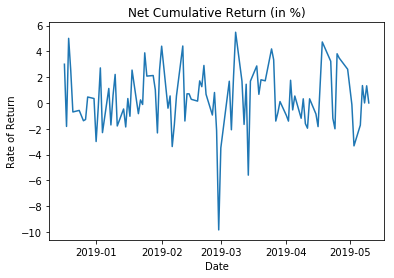

In [21]:
plt.figure()
plt.plot(df2.index[len(df2) - len(y_pred):],y_axis)
plt.title("Net Cumulative Return (in %)")
plt.xlabel("Date")
plt.ylabel("Rate of Return")
plt.show()